# Pothole Detection using FastAI

## Step 1: Setup

In [1]:
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.8 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
from fastai.data.all import *

In [5]:
!unzip /content/pothole.zip -d /content/dataset

Archive:  /content/pothole.zip
  inflating: /content/dataset/normal/1.jpg  
  inflating: /content/dataset/normal/10.jpg  
  inflating: /content/dataset/normal/100.jpg  
  inflating: /content/dataset/normal/101.jpg  
  inflating: /content/dataset/normal/102.jpg  
  inflating: /content/dataset/normal/103.jpg  
  inflating: /content/dataset/normal/104.jpg  
  inflating: /content/dataset/normal/105.jpg  
  inflating: /content/dataset/normal/106.jpg  
  inflating: /content/dataset/normal/107.jpg  
  inflating: /content/dataset/normal/108.jpg  
  inflating: /content/dataset/normal/109.jpg  
  inflating: /content/dataset/normal/11.jpg  
  inflating: /content/dataset/normal/110.jpg  
  inflating: /content/dataset/normal/111.jpg  
  inflating: /content/dataset/normal/112.jpg  
  inflating: /content/dataset/normal/113.jpg  
  inflating: /content/dataset/normal/114.jpg  
  inflating: /content/dataset/normal/115.jpg  
  inflating: /content/dataset/normal/116.jpg  
  inflating: /content/dataset/nor

## Step 2: Preparing the Dataset

In [7]:
path = Path('/content/dataset')
print(path.ls())  # This should show 'normal' and 'potholes' directories

# Check a few files to ensure they're being correctly located
print(get_image_files(path/"normal")[:5])  # Adjust if your structure differs


[Path('/content/dataset/normal'), Path('/content/dataset/potholes')]
[Path('/content/dataset/normal/311.jpg'), Path('/content/dataset/normal/147.jpg'), Path('/content/dataset/normal/169.jpg'), Path('/content/dataset/normal/42.jpg'), Path('/content/dataset/normal/161.jpg')]


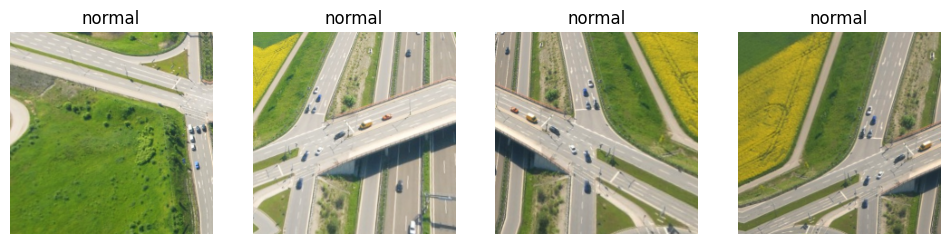

In [8]:
potholes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# Attempt to create DataLoaders again
dls = potholes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


## Step 3: Creating and training the Model

In [9]:
# Create a CNN learner and train the model
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 118MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.855054,0.498858,0.132353,03:59


epoch,train_loss,valid_loss,error_rate,time
0,0.200830,0.060885,0.029412,05:23
1,0.137058,0.050086,0.029412,05:12
2,0.111760,0.024661,0.007353,05:05
3,0.092334,0.022024,0.007353,05:02


## Step 4: Evaluating the Model

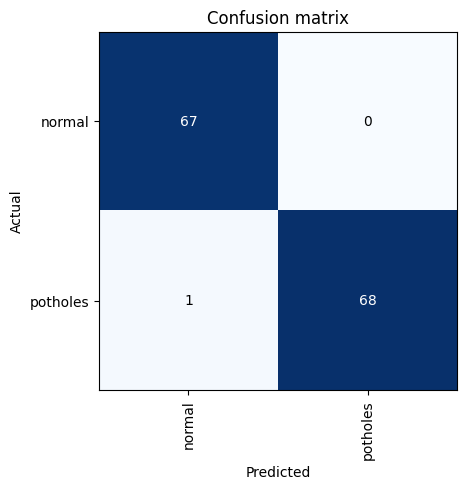

In [10]:
# Plot confusion matrix to evaluate the model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


## Step 5: Exporting the Model for Inference

In [11]:
learn.export('pothole_classifier.pkl')

# Sample Prediction
learn_inf = load_learner('pothole_classifier.pkl')
learn_inf.predict('/content/dataset/normal/310.jpg')

('normal', tensor(0), tensor([9.9986e-01, 1.3690e-04]))

In [12]:
learn_inf.predict('/content/dataset/normal/311.jpg')

('normal', tensor(0), tensor([9.9998e-01, 1.7931e-05]))

In [13]:
learn_inf.predict('/content/dataset/potholes/10.jpg')

('potholes', tensor(1), tensor([8.4892e-06, 9.9999e-01]))